In [10]:
import pandas as pd
import numpy as np
import os
import graphviz
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#### Part 0: Initalize and Load data

In [2]:
from google.colab import drive

# drive.mount('/content/drive/')
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [3]:
os.chdir('./drive/MyDrive/ML DS539/CoLab')

In [4]:
training = pd.read_csv("training.csv", index_col = "Unnamed: 0")
testing = pd.read_csv("testing.csv", index_col = "Unnamed: 0")

In [5]:
training.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhodes Island,...,parent_count,parent_rate,other_family_count,other_family_rate,Blunt Object_count,Blunt Object_rate,Strangulation_count,Strangulation_rate,Unknown_count,Unknown_rate,Rifle_count,Rifle_rate,Knife_count,Knife_rate,Firearm_count,Firearm_rate,Shotgun_count,Shotgun_rate,Fall_count,Fall_rate,Handgun_count,Handgun_rate,Drowning_count,Drowning_rate,Suffocation_count,Suffocation_rate,Explosives_count,Explosives_rate,Fire_count,Fire_rate,Drugs_count,Drugs_rate,Gun_count,Gun_rate,Poison_count,Poison_rate,Crime Rate,Top_10,Next_Year_Top_10,Next_Year_Crime_Rate
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,1.0,0.021277,4.0,0.085106,2.0,0.042553,5.0,0.106383,15.0,0.319149,5.0,0.106383,4.0,0.085106,2.0,0.042553,1.0,0.021277,8.0,0.170213,1.0,0.021277,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,11.595919,1,1.0,16.487810
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4.0,0.057971,1.0,0.014493,1.0,0.014493,2.0,0.028986,2.0,0.028986,15.0,0.217391,7.0,0.101449,1.0,0.014493,10.0,0.144928,0.0,0.000000,27.0,0.391304,2.0,0.028986,1.0,0.014493,0.0,0.0,1.0,0.014493,0.0,0.0,0.0,0.0,0.0,0.0,16.487810,1,1.0,16.681272
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.013333,3.0,0.040000,7.0,0.093333,3.0,0.040000,4.0,0.053333,11.0,0.146667,9.0,0.120000,2.0,0.026667,2.0,0.026667,0.0,0.000000,36.0,0.480000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.013333,0.0,0.0,0.0,0.0,0.0,0.0,16.681272,1,1.0,15.150988
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4.0,0.054054,4.0,0.054054,6.0,0.081081,2.0,0.027027,5.0,0.067568,16.0,0.216216,11.0,0.148649,1.0,0.013514,11.0,0.148649,0.0,0.000000,22.0,0.297297,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,15.150988,1,1.0,10.122600
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,0.057692,0.0,0.000000,5.0,0.096154,2.0,0.038462,1.0,0.019231,11.0,0.211538,7.0,0.134615,0.0,0.000000,2.0,0.038462,0.0,0.000000,22.0,0.423077,0.0,0.000000,0.0,0.000000,0.0,0.0,2.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,10.122600,1,1.0,9.389760


In [6]:
training = training.drop(["state", "Next_Year_Crime_Rate"], axis=1)
testing = testing.drop(["state", "Next_Year_Crime_Rate"], axis=1)

In [7]:
X_train = training.drop(["Next_Year_Top_10"], axis=1)
X_test = testing.drop(["Next_Year_Top_10"], axis=1)

y_train = training["Next_Year_Top_10"]
y_test = testing["Next_Year_Top_10"]

In [8]:
X_train["year"] = [(1 + (i-1980)) for i in X_train["year"]]
X_test["year"] = [(1 + (i-1980)) for i in X_test["year"]]

In [9]:
X_train["year"]

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
1774    25.0
1775    26.0
1776    27.0
1777    28.0
1778    29.0
Name: year, Length: 1479, dtype: float64

#### Part 1: Random Forest

In [12]:
clf_1 = RandomForestClassifier()
clf_1.fit(X_train, y_train)

RandomForestClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


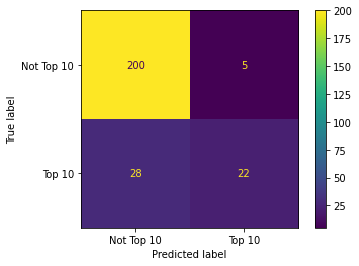

In [13]:
plot_confusion_matrix(clf_1, X_test, y_test, display_labels= ["Not Top 10", "Top 10"])

In [14]:
print(classification_report(y_test, clf_1.predict(X_test), target_names= ["Not Top 10", "Top 10"]))

              precision    recall  f1-score   support

  Not Top 10       0.88      0.98      0.92       205
      Top 10       0.81      0.44      0.57        50

    accuracy                           0.87       255
   macro avg       0.85      0.71      0.75       255
weighted avg       0.86      0.87      0.85       255



#### Part 1-1: Random Forest w/entropy

In [15]:
clf_1 = RandomForestClassifier(criterion = "entropy")
clf_1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


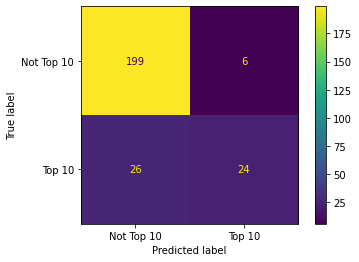

In [16]:
plot_confusion_matrix(clf_1, X_test, y_test, display_labels= ["Not Top 10", "Top 10"])

In [17]:
print(classification_report(y_test, clf_1.predict(X_test), target_names= ["Not Top 10", "Top 10"]))

              precision    recall  f1-score   support

  Not Top 10       0.88      0.97      0.93       205
      Top 10       0.80      0.48      0.60        50

    accuracy                           0.87       255
   macro avg       0.84      0.73      0.76       255
weighted avg       0.87      0.87      0.86       255



#### Part 2: Random Forest with fitting for n_estimators

In [20]:
from sklearn.model_selection import train_test_split
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, random_state=0)

In [25]:
clfs = []
no_of_estimators = [i for i in range(50, 200)]

for estimator in no_of_estimators:
    clf = RandomForestClassifier(criterion = "entropy", n_estimators=estimator)
    clf.fit(X_train_1, y_train_1)
    clfs.append(clf)

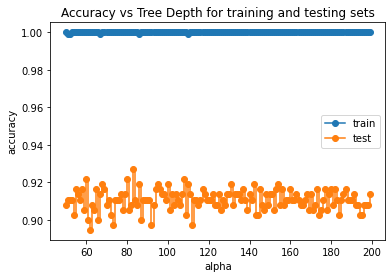

In [26]:
train_scores = [clf.score(X_train_1, y_train_1) for clf in clfs]
test_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for training and testing sets")
ax.plot(no_of_estimators, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(no_of_estimators, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

this gives us nothing, so not moving forward with this

#### Part 3: Random Forest with fitting for max depth

In [34]:
clfs = []
max_depth = [i for i in range(2, 16)]

for depth in max_depth:
    clf = RandomForestClassifier(max_depth=depth)
    clf.fit(X_train_1, y_train_1)
    clfs.append(clf)

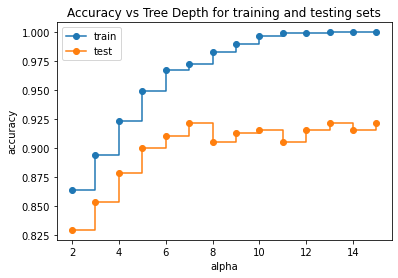

In [35]:
train_scores = [clf.score(X_train_1, y_train_1) for clf in clfs]
test_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for training and testing sets")
ax.plot(max_depth, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(max_depth, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

best max depth is 7

In [36]:
clf_1 = RandomForestClassifier(max_depth = 7)
clf_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


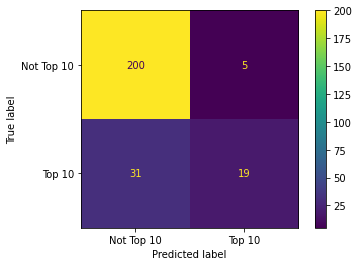

In [37]:
plot_confusion_matrix(clf_1, X_test, y_test, display_labels= ["Not Top 10", "Top 10"])

In [38]:
print(classification_report(y_test, clf_1.predict(X_test), target_names= ["Not Top 10", "Top 10"]))

              precision    recall  f1-score   support

  Not Top 10       0.87      0.98      0.92       205
      Top 10       0.79      0.38      0.51        50

    accuracy                           0.86       255
   macro avg       0.83      0.68      0.72       255
weighted avg       0.85      0.86      0.84       255



#### Part 3: Random Forest with fitting for max depth w/entropy

In [39]:
clfs = []
max_depth = [i for i in range(2, 16)]

for depth in max_depth:
    clf = RandomForestClassifier(criterion = "entropy", max_depth=depth)
    clf.fit(X_train_1, y_train_1)
    clfs.append(clf)

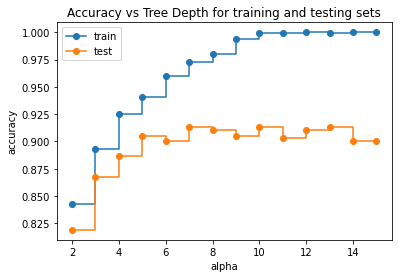

In [40]:
train_scores = [clf.score(X_train_1, y_train_1) for clf in clfs]
test_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Tree Depth for training and testing sets")
ax.plot(max_depth, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(max_depth, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

best max depth is 9?

In [44]:
clf_1 = RandomForestClassifier(max_depth = 9, criterion="entropy")
clf_1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


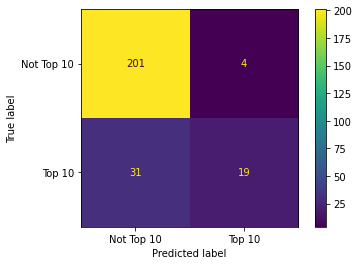

In [45]:
plot_confusion_matrix(clf_1, X_test, y_test, display_labels= ["Not Top 10", "Top 10"])

In [49]:
print(classification_report(y_test, clf_1.predict(X_test), target_names= ["Not Top 10", "Top 10"]))

              precision    recall  f1-score   support

  Not Top 10       0.87      0.98      0.92       205
      Top 10       0.83      0.38      0.52        50

    accuracy                           0.86       255
   macro avg       0.85      0.68      0.72       255
weighted avg       0.86      0.86      0.84       255

